In [22]:
import pandas as pd

In [23]:
crime_df = pd.read_csv("Crimes.csv")
full_moon_df = pd.read_csv("full_moon.csv")
holiday_df = pd.read_csv("Crimes.csv")
weather_df = pd.read_csv("weather.csv")

In [24]:
pd.set_option('display.max_columns', None)

crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13210072,JG422242,08/11/2023 11:00:00 AM,0000X S ALBANY AVE,1790,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,RESIDENCE,False,True,1124,11,28.0,27.0,26,1155914.0,1899709.0,2023,09/16/2023 03:41:56 PM,41.880594,-87.702959,"(41.880594385, -87.702959421)"
1,13278080,JG500620,11/11/2023 12:00:00 AM,038XX W MADISON ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1122,11,28.0,26.0,07,1150898.0,1899740.0,2023,11/18/2023 03:40:25 PM,41.880779,-87.721377,"(41.880779076, -87.721377025)"
2,13276884,JG503649,11/10/2023 05:30:00 PM,043XX W AUGUSTA BLVD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1111,11,37.0,23.0,07,1147361.0,1906313.0,2023,11/18/2023 03:40:25 PM,41.898885,-87.734196,"(41.898884591, -87.734196199)"
3,12990873,JG161829,08/17/2019 01:14:00 PM,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1111,11,37.0,23.0,17,1148899.0,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)"
4,26262,JE366265,09/08/2021 04:45:00 PM,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,11,24.0,25.0,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512182,13044797,JG226598,04/17/2023 08:45:00 AM,027XX W HARRISON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1135,11,28.0,27.0,08B,1158295.0,1897254.0,2023,08/19/2023 03:40:26 PM,41.873809,-87.694284,"(41.873809306, -87.694283701)"
512183,13145202,JG345638,07/08/2023 02:15:00 AM,047XX W VAN BUREN ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1131,11,28.0,25.0,11,1144849.0,1897606.0,2023,08/19/2023 03:40:26 PM,41.875039,-87.743643,"(41.875039334, -87.743642536)"
512184,13086004,JG275808,05/26/2023 12:01:00 AM,007XX S KILBOURN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,True,1131,11,24.0,26.0,14,1146447.0,1896199.0,2023,08/19/2023 03:40:26 PM,41.871148,-87.737811,"(41.871148079, -87.737811112)"
512185,13057758,JG242228,04/29/2023 08:43:00 PM,038XX W ADAMS ST,2093,NARCOTICS,FOUND SUSPECT NARCOTICS,STREET,True,False,1122,11,28.0,26.0,18,1150830.0,1898737.0,2023,08/19/2023 03:40:26 PM,41.878028,-87.721653,"(41.878028065, -87.721652966)"


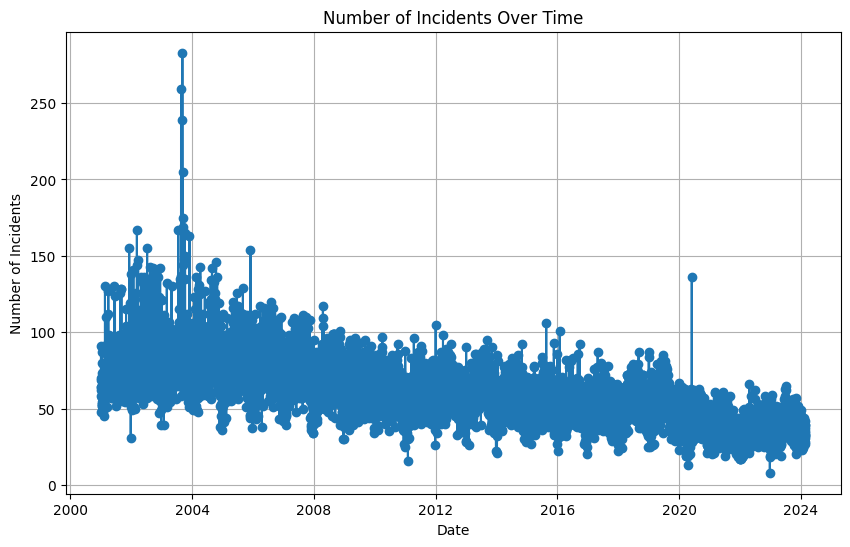

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'crime_df' is your DataFrame containing crime data

# Step 1: Convert 'Date' column to datetime
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Step 2: Group by date and count incidents
incident_counts = crime_df.groupby(crime_df['Date'].dt.date).size()

# Step 3: Plot the data
plt.figure(figsize=(10, 6))
incident_counts.plot(kind='line', marker='o', linestyle='-')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


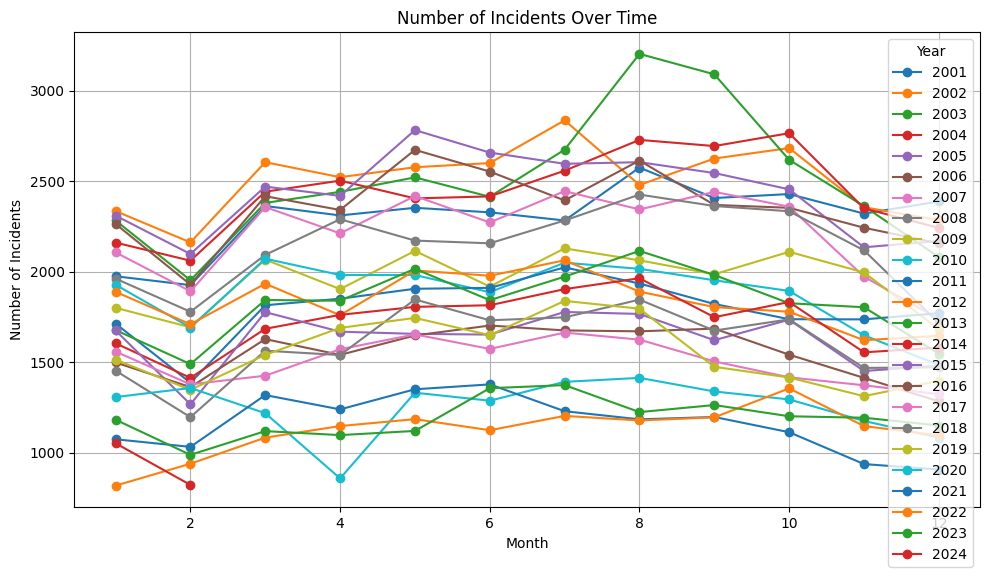

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'crime_df' is your DataFrame containing crime data

# Step 1: Convert 'Date' column to datetime
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

# Step 2: Group by year and month and count incidents
incident_counts_by_year_month = crime_df.groupby([crime_df['Date'].dt.year, crime_df['Date'].dt.month]).size()

# Step 3: Plot the data with different colors for each year
plt.figure(figsize=(10, 6))

for year, data in incident_counts_by_year_month.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data.values, marker='o', linestyle='-', label=str(year))

plt.title('Number of Incidents Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()



In [27]:
unique_FBI_Code = crime_df['FBI Code'].unique()
print(unique_FBI_Code)


['26' '07' '17' '01A' '18' '11' '08B' '04B' '08A' '24' '04A' '03' '14'
 '06' '05' '15' '02' '13' '20' '10' '09' '01B' '22' '16' '19' '12' '27']


| Code | Description                                               | Index        | Violent/Property |
|------|-----------------------------------------------------------|--------------|------------------|
| 01A  | HOMICIDE – 1ST OR 2ND DEGREE (INDEX)                      | INDEX        | VIOLENT INDEX    |
| 01B  | INVOLUNTARY MANSLAUGHTER / RECKLESS HOMICIDE W/ VEHICLE   | NON-INDEX    | NON-INDEX        |
| 02   | CRIMINAL SEXUAL ASSAULT (INDEX)                           | INDEX        | VIOLENT INDEX    |
| 03   | ROBBERY (INDEX)                                           | INDEX        | VIOLENT INDEX    |
| 04   | AGGRAVATED ASSAULT / BATTERY (INDEX)                      | INDEX        | VIOLENT INDEX    |
| 04A  | AGGRAVATED ASSAULT (INDEX)                                | INDEX        | VIOLENT INDEX    |
| 04B  | AGGRAVATED BATTERY (INDEX)                                | INDEX        | VIOLENT INDEX    |
| 05   | BURGLARY (INDEX)                                          | INDEX        | PROPERTY INDEX   |
| 06   | LARCENY – THEFT (INDEX)                                   | INDEX        | PROPERTY INDEX   |
| 07   | MOTOR VEHICLE THEFT (INDEX)                               | INDEX        | PROPERTY INDEX   |
| 08   | SIMPLE ASSAULT / BATTERY                                  | NON-INDEX    | NON-INDEX        |
| 08A  | SIMPLE ASSAULT                                            | NON-INDEX    | NON-INDEX        |
| 08B  | SIMPLE BATTERY                                            | NON-INDEX    | NON-INDEX        |
| 09   | ARSON (INDEX)                                             | INDEX        | PROPERTY INDEX   |
| 10   | FORGERY AND COUNTERFEITING                                | NON-INDEX    | NON-INDEX        |
| 11   | FRAUD                                                     | NON-INDEX    | NON-INDEX        |
| 12   | EMBEZZLEMENT                                              | NON-INDEX    | NON-INDEX        |
| 13   | STOLEN PROPERTY: BUY, RECEIVE, POSSESS                    | NON-INDEX    | NON-INDEX        |
| 14   | VANDALISM                                                 | NON-INDEX    | NON-INDEX        |
| 15   | WEAPONS                                                   | NON-INDEX    | NON-INDEX        |
| 16   | PROSTITUTION                                              | NON-INDEX    | NON-INDEX        |
| 17   | SEX OFFENSE – CRIMINAL SEXUAL ABUSE                       | NON-INDEX    | NON-INDEX        |
| 18   | DRUG ABUSE VIOLATIONS                                     | NON-INDEX    | NON-INDEX        |
| 19   | GAMBLING                                                  | NON-INDEX    | NON-INDEX        |
| 20   | OFFENSES AGAINST FAMILY AND CHILDREN / INVOLVING CHILDREN | NON-INDEX    | NON-INDEX        |
| 21   | DRIVING UNDER THE INFLUENCE                               | NON-INDEX    | NON-INDEX        |
| 22   | LIQUOR LAWS                                               | NON-INDEX    | NON-INDEX        |
| 24   | DISORDERLY CONDUCT                                        | NON-INDEX    | NON-INDEX        |
| 26   | MISCELLANEOUS NON-INDEX OFFENSES                          | NON-INDEX    | NON-INDEX        |
| MCC  | MISCELLANEOUS MUNICIPAL CODE VIOLATIONS                   | MCC          | MCC              |
| TRF  | TRAFFIC VIOLATIONS                                        | TRF          | TRF              |
| WRT  | WARRANT ARRESTS                                           | WRT          | WRT              |
| 00   | NON-CRIMINAL                                              | NON-CRIMINAL | NON-CRIMINAL     |


In [28]:
#Info found here: https://home.chicagopolice.org/statistics-data/data-requests/
#17 is Criminal Sex Abuse, which has a NON-INDEX value, but I consider it violent #20 is anything related to children. Going to do further filtering on these values

violent_fbi = ['01A', '02', '03', '04', '04A', '04B', '17', '20']

In [29]:
filtered_crime_df = crime_df[crime_df['FBI Code'].isin(violent_fbi)]

filtered_crime_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
3,12990873,JG161829,2019-08-17 13:14:00,008XX N KARLOV AVE,1751,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,True,True,1111,11,37.0,23.0,17,1148899.0,1905351.0,2019,09/14/2023 03:41:59 PM,41.896215,-87.728572,"(41.89621515, -87.728572048)"
4,26262,JE366265,2021-09-08 16:45:00,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,11,24.0,25.0,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
13,13202316,JG414343,2023-09-06 16:00:00,011XX S ST LOUIS AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",ALLEY,False,True,1133,11,24.0,29.0,04B,1153217.0,1894682.0,2023,09/14/2023 03:43:09 PM,41.866854,-87.712996,"(41.866853689, -87.712996017)"
18,13203412,JG415087,2023-09-06 21:00:00,033XX W ARTHINGTON ST,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,True,1134,11,24.0,29.0,04A,1154345.0,1895847.0,2023,09/14/2023 03:43:09 PM,41.870028,-87.708824,"(41.870028132, -87.708823855)"
19,13201689,JG413578,2023-09-06 13:01:00,042XX W THOMAS ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,1111,11,37.0,23.0,03,1148012.0,1907000.0,2023,09/14/2023 03:43:09 PM,41.900757,-87.731787,"(41.90075729, -87.731787389)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512158,13180525,JG388354,2023-08-18 20:43:00,039XX W ROOSEVELT RD,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,1132,11,24.0,29.0,04A,1150118.0,1894416.0,2023,08/26/2023 03:42:17 PM,41.866185,-87.724380,"(41.866184642, -87.724379838)"
512169,13073096,JG260872,2023-05-15 02:15:00,039XX W MONROE ST,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,False,1122,11,28.0,26.0,04B,1150205.0,1899372.0,2023,08/19/2023 03:40:26 PM,41.879783,-87.723931,"(41.879782775, -87.72393128)"
512170,13153191,JG355989,2023-07-25 19:28:00,036XX W GRENSHAW ST,0553,ASSAULT,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,ALLEY,True,False,1133,11,24.0,29.0,04A,1152343.0,1894798.0,2023,08/19/2023 03:40:26 PM,41.867189,-87.716202,"(41.867189292, -87.716201538)"
512179,13061873,JG247177,2023-05-03 23:12:00,035XX W ADAMS ST,051A,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,True,True,1123,11,28.0,27.0,04A,1152863.0,1898846.0,2023,08/19/2023 03:40:26 PM,41.878287,-87.714185,"(41.87828717, -87.714185338)"


In [30]:
filtered_by_fbi_code_17 = filtered_crime_df[filtered_crime_df['FBI Code'] == '17']

filtered_by_fbi_code_17 = filtered_crime_df[filtered_crime_df['FBI Code'] == '20']
sorted(filtered_by_fbi_code_17['IUCR'].unique())

['1710',
 '1715',
 '1720',
 '1725',
 '1750',
 '1751',
 '1752',
 '1755',
 '1780',
 '1790',
 '1791',
 '1792']

In [31]:
violent_17_20_charges = ['1562', '1563','1590', '1750','1751', '1752', '5004', '5005']

In [33]:
filtered_df = filtered_crime_df[~filtered_crime_df['FBI Code'].isin(['17', '20'])]
violent_filtered_df = filtered_crime_df[(filtered_crime_df['FBI Code'].isin(['17', '20'])) & (filtered_crime_df['IUCR'].isin(violent_17_20_charges))]
final_df = pd.concat([filtered_df, violent_filtered_df])
final_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
4,26262,JE366265,2021-09-08 16:45:00,047XX W HARRISON ST,0110,HOMICIDE,FIRST DEGREE MURDER,CAR WASH,True,False,1131,11,24.0,25.0,01A,1144907.0,1896933.0,2021,09/14/2023 03:41:59 PM,41.873191,-87.743447,"(41.873191445, -87.743446563)"
13,13202316,JG414343,2023-09-06 16:00:00,011XX S ST LOUIS AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",ALLEY,False,True,1133,11,24.0,29.0,04B,1153217.0,1894682.0,2023,09/14/2023 03:43:09 PM,41.866854,-87.712996,"(41.866853689, -87.712996017)"
18,13203412,JG415087,2023-09-06 21:00:00,033XX W ARTHINGTON ST,0520,ASSAULT,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESIDENCE,False,True,1134,11,24.0,29.0,04A,1154345.0,1895847.0,2023,09/14/2023 03:43:09 PM,41.870028,-87.708824,"(41.870028132, -87.708823855)"
19,13201689,JG413578,2023-09-06 13:01:00,042XX W THOMAS ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,STREET,False,False,1111,11,37.0,23.0,03,1148012.0,1907000.0,2023,09/14/2023 03:43:09 PM,41.900757,-87.731787,"(41.90075729, -87.731787389)"
23,13202354,JG414329,2023-09-06 23:50:00,031XX W LEXINGTON ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,APARTMENT,False,True,1134,11,24.0,27.0,04B,1155568.0,1896532.0,2023,09/14/2023 03:43:09 PM,41.871883,-87.704315,"(41.87188334, -87.704315401)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510696,13177593,JG384675,2023-08-16 03:00:00,006XX N ST LOUIS AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1121,11,27.0,23.0,17,1152933.0,1904102.0,2023,08/24/2023 03:42:05 PM,41.892709,-87.713789,"(41.892708787, -87.713788982)"
510861,13151041,JG353530,2023-03-01 00:00:00,008XX N KEYSTONE AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,1111,11,37.0,23.0,17,1149235.0,1905307.0,2023,08/19/2023 03:40:26 PM,41.896088,-87.727339,"(41.896087903, -87.727339116)"
510951,13151968,JG354198,2023-07-24 09:00:00,0000X S KEDZIE AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,STREET,False,False,1124,11,28.0,27.0,17,1155056.0,1899700.0,2023,08/19/2023 03:40:26 PM,41.880587,-87.706110,"(41.880586939, -87.706110174)"
511344,13152684,JG354005,2023-02-01 00:00:00,028XX W JACKSON BLVD,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,1124,11,27.0,27.0,17,1157335.0,1898562.0,2023,08/19/2023 03:40:26 PM,41.877418,-87.697773,"(41.877418146, -87.69777281)"


In [ ]:
final_df.to_csv('violent_crimes.csv', index=False)